Задача:

Определить правдивость рейтингов фильмов сайта Fandango. Сравнить рейтинки других компаний и найти правдивые.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Сравниваем рейтинги Fandango и другие пользовательские рейтинги

In [ ]:
fandango = pd.read_csv(r"Data Analysis\data\fandango_scrape.csv")

In [34]:
fandango.head(3)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085


In [35]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [36]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Изучим связь между популярностью фильма и его рейтингом

<Axes: xlabel='RATING', ylabel='VOTES'>

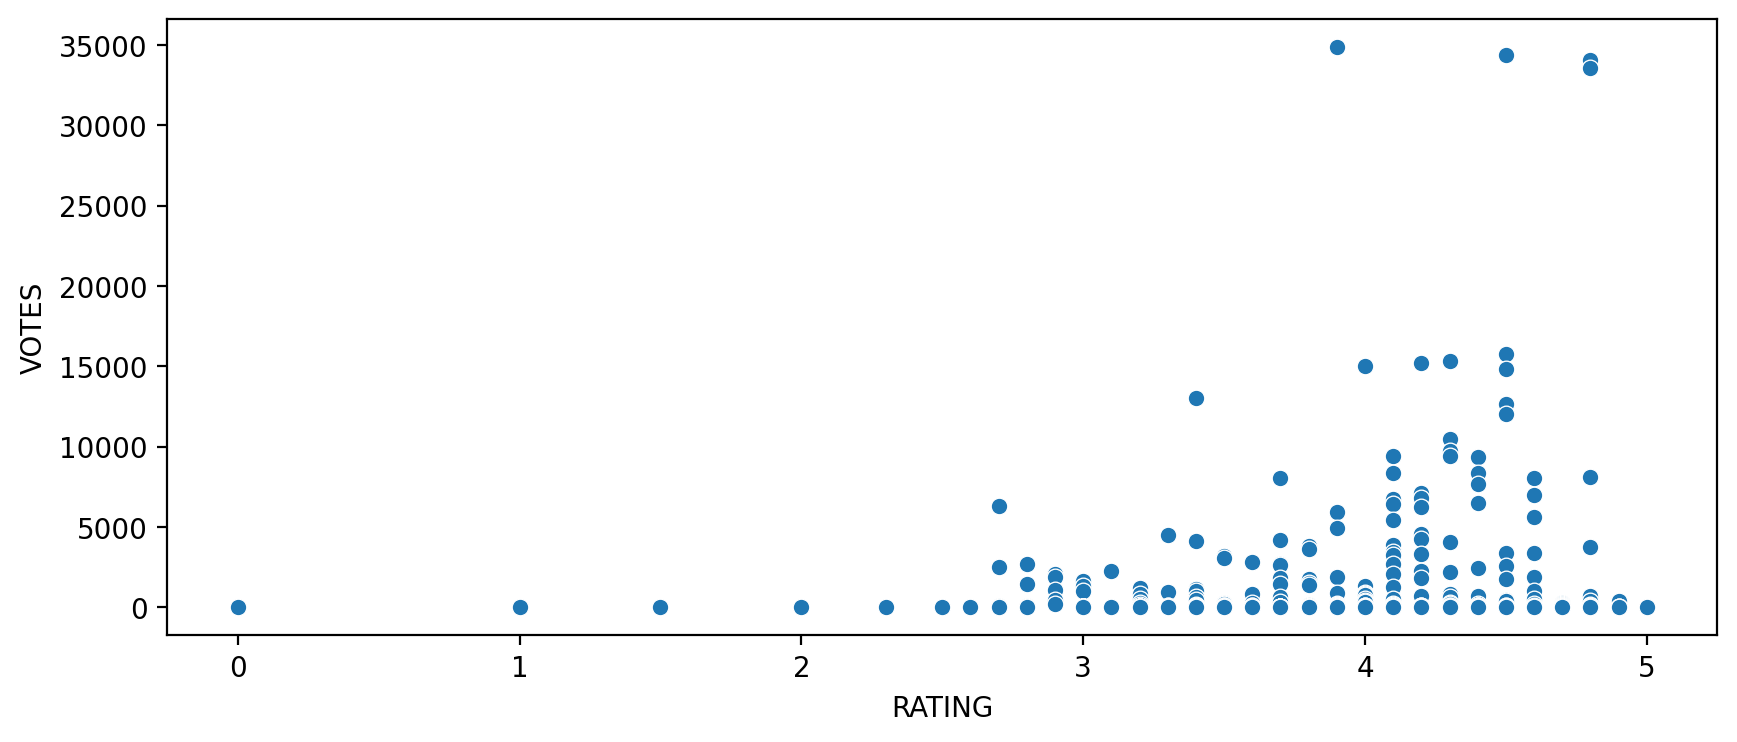

In [37]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

Мы не увидели связи, но видим выбросы по редким фильмам и очень высокие рейтинги.

Вычислим корреляцию между колонками

In [38]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Добавим колонку с годом выпуска фильма. Из колонки Film нужно взять год и доавить в колонку YEAR

In [39]:
# Способ 1
title = 'Название Фильма (Год)'

In [40]:
title.split('(')

['Название Фильма ', 'Год)']

In [41]:
title.split('(')[-1]

'Год)'

In [42]:
title.split('(')[-1].replace(')', '')

'Год'

In [43]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))

In [44]:
fandango.head(3)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015


Посчитать количество фильмов по годам

In [45]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

Визуализировать количество фильмов по годам при помощи графиков

<Axes: xlabel='YEAR', ylabel='count'>

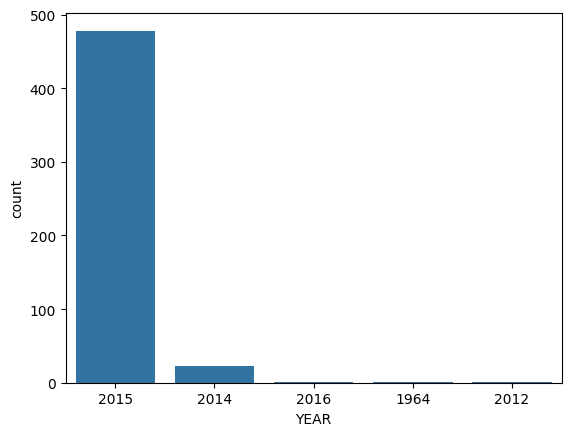

In [46]:
sns.countplot(data=fandango, x='YEAR')

Найти 10 фильмов с наибольшим количеством голосов

In [47]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Сколько фильмов имеет 0 голосов?

In [48]:
# 1 способ
no_votes = fandango['VOTES'] == 0
no_votes.sum()

np.int64(69)

In [49]:
# 2 способ
fandango[fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [50]:
len(fandango[fandango['VOTES'] == 0])

69

Создать датафрейм с фильмами, которые содержат хотя бы 1 голос (удалить фильмы с 0 голосов)

In [51]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

Сравнить колонки STARS и REITING построив график

<Axes: xlabel='RATING', ylabel='Density'>

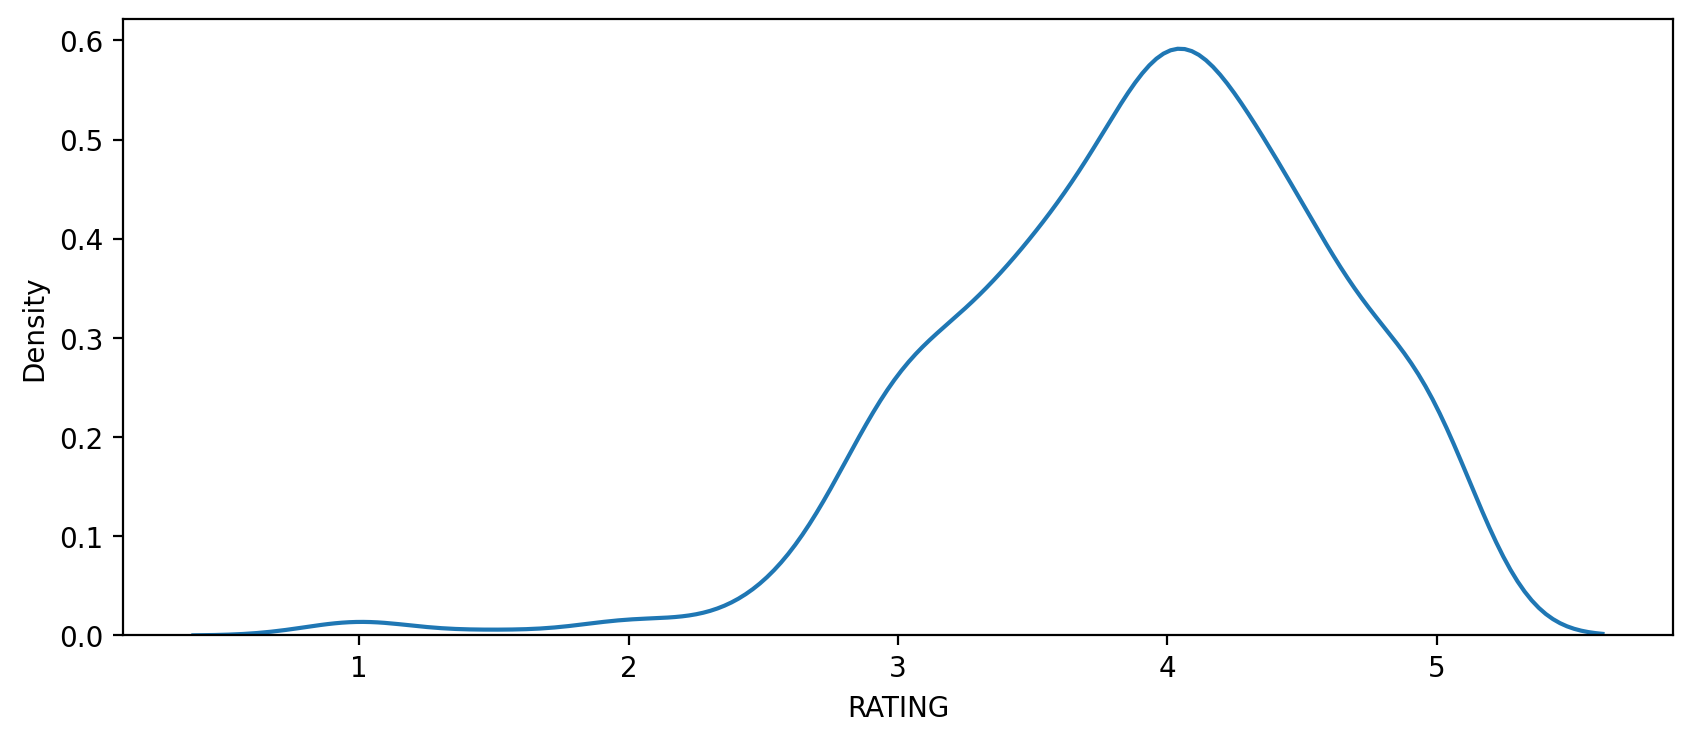

In [52]:
plt.figure(figsize=(10, 4), dpi=200)
sns.kdeplot(data=fan_reviewed, x='RATING')

<Axes: xlabel='RATING', ylabel='Density'>

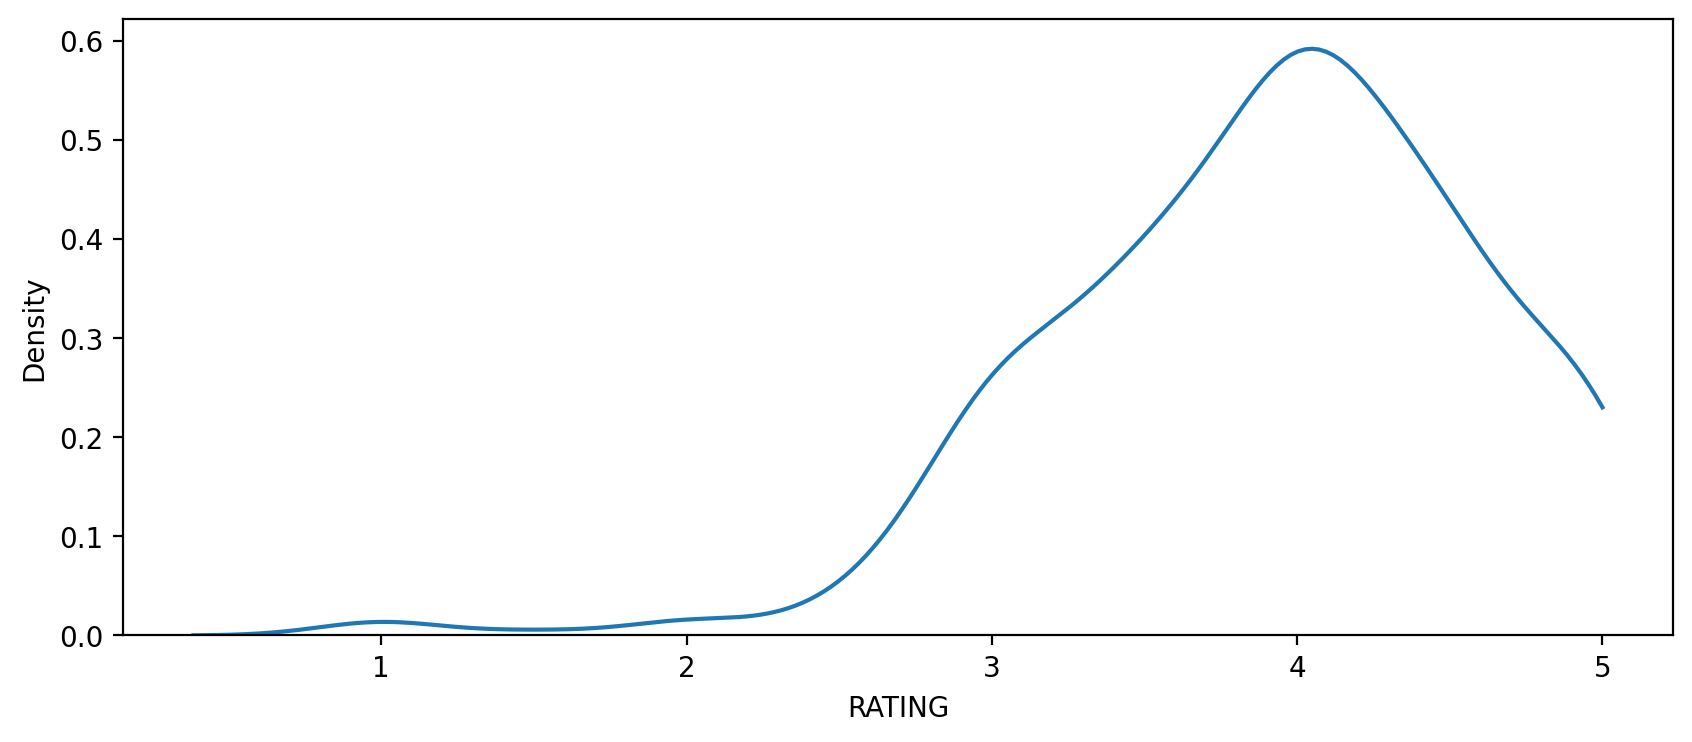

In [53]:
plt.figure(figsize=(10, 4), dpi=200)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0, 5])

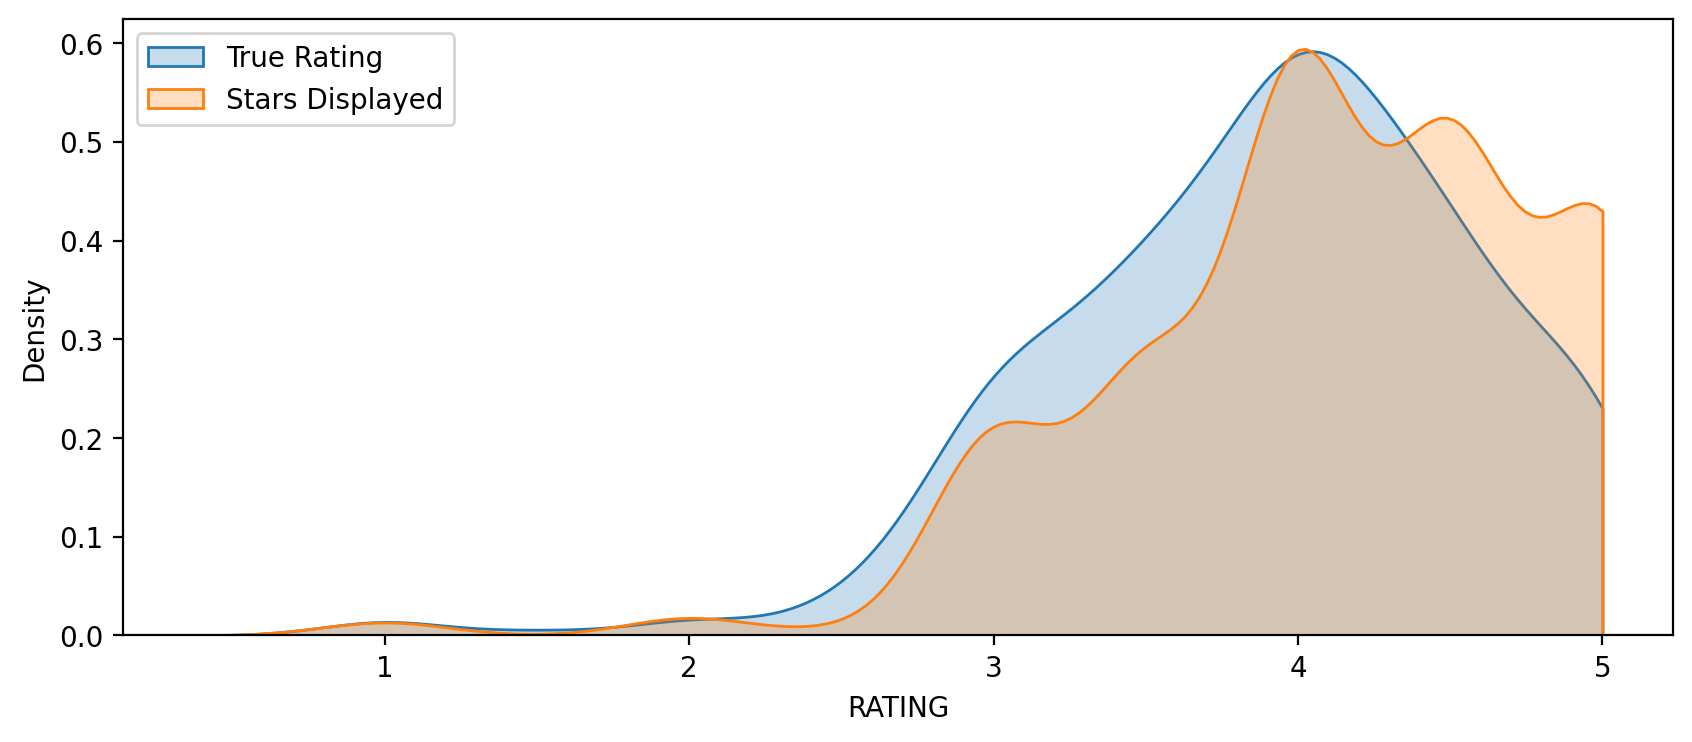

In [54]:
plt.figure(figsize=(10, 4), dpi=200)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0, 5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0, 5], fill=True, label='Stars Displayed')
plt.legend()

Посчитаем разницу в цифрах между STARS и Rating. Создадим новую колонку, где сохраним разницу между колонками при помощи вычитания, а так же округлим до десятичной цифры.

In [ ]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

In [56]:
fan_reviewed.head(3)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2


In [ ]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(1)

Посмотрим сколько раз встречается то или иное значение разницы между STAR и RATING

In [ ]:
plt.figure(figsize=(10, 4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

Найдем фильм, который имеет разницу в 1 звезду между отображаемым и истинным рейтингом

In [59]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Сравнение рейтингов Fandango с рейтингами других компаний

Посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний

In [60]:
all_sites = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Data Analysis\data\all_sites_scores.csv")

In [61]:
all_sites.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660


In [62]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [63]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Нарисуем график для Rotten Tomatoes. Определим связь между рейтингами критиков и пользователями

(0.0, 100.0)

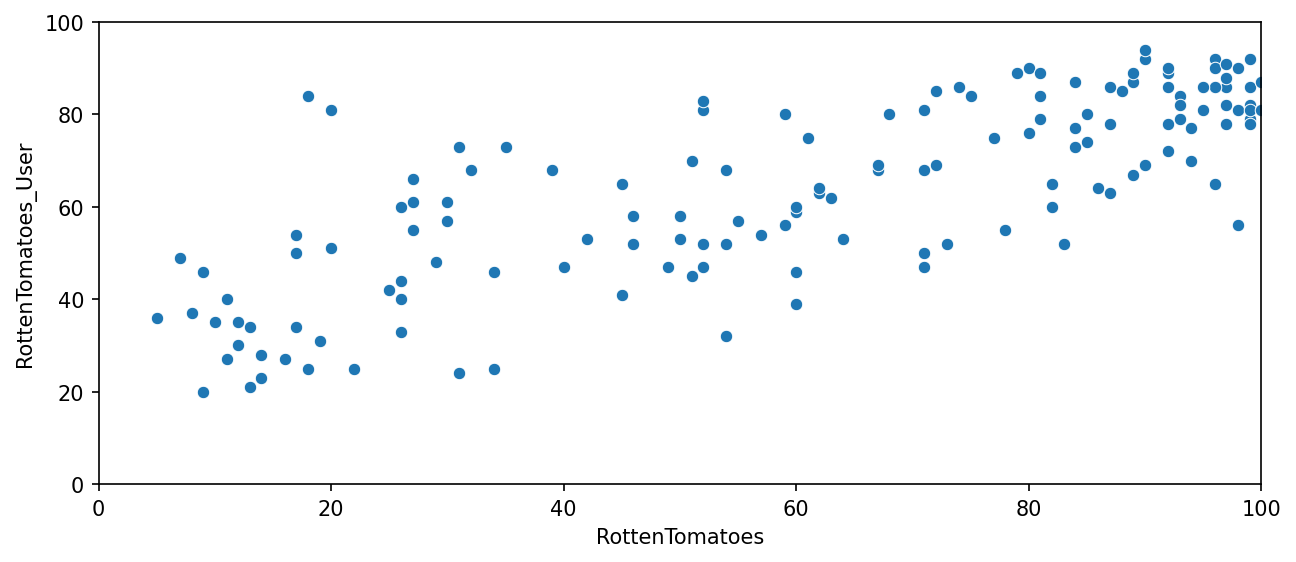

In [64]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0, 100)
plt.ylim(0, 100)

Создадим колонку, в которой сохраним разницу между рейтингами критиков и пользователей

In [65]:
all_sites['Rotten_Dif'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Вычислим среднюю абсолютную разницу между рейтингами

In [66]:
all_sites['Rotten_Dif'].apply(abs).mean()

np.float64(15.095890410958905)

Нарисуем график распределения ращницы между рейтингами пользователей и критиков

<Axes: xlabel='Rotten_Dif', ylabel='Count'>

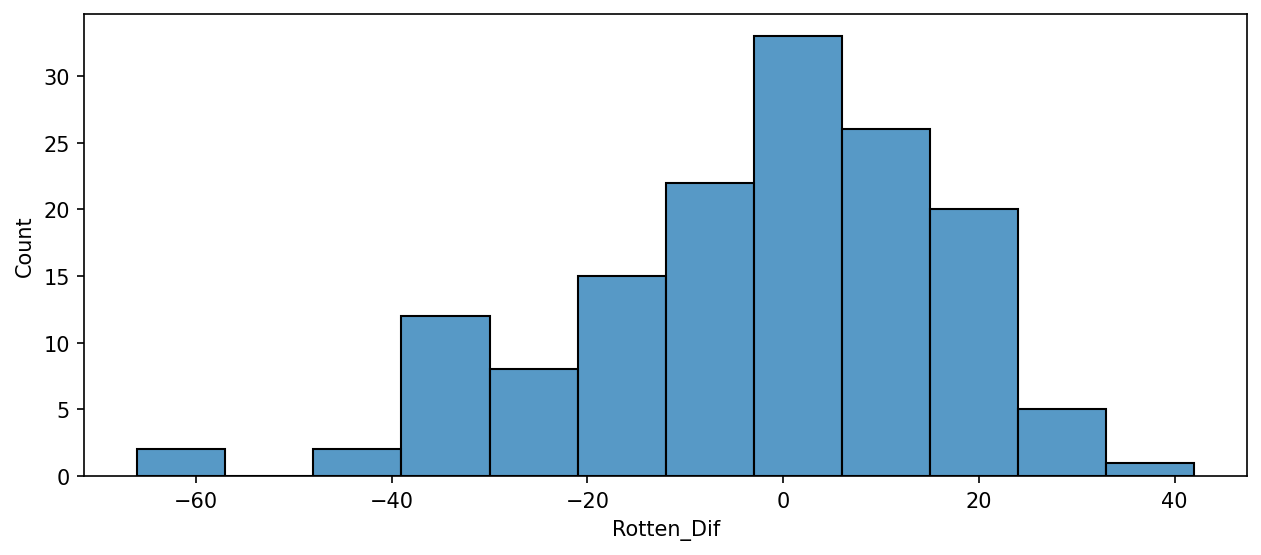

In [67]:
plt.figure(figsize=(10, 4), dpi=150)
sns.histplot(data=all_sites, x='Rotten_Dif')

<Axes: xlabel='Rotten_Dif', ylabel='Count'>

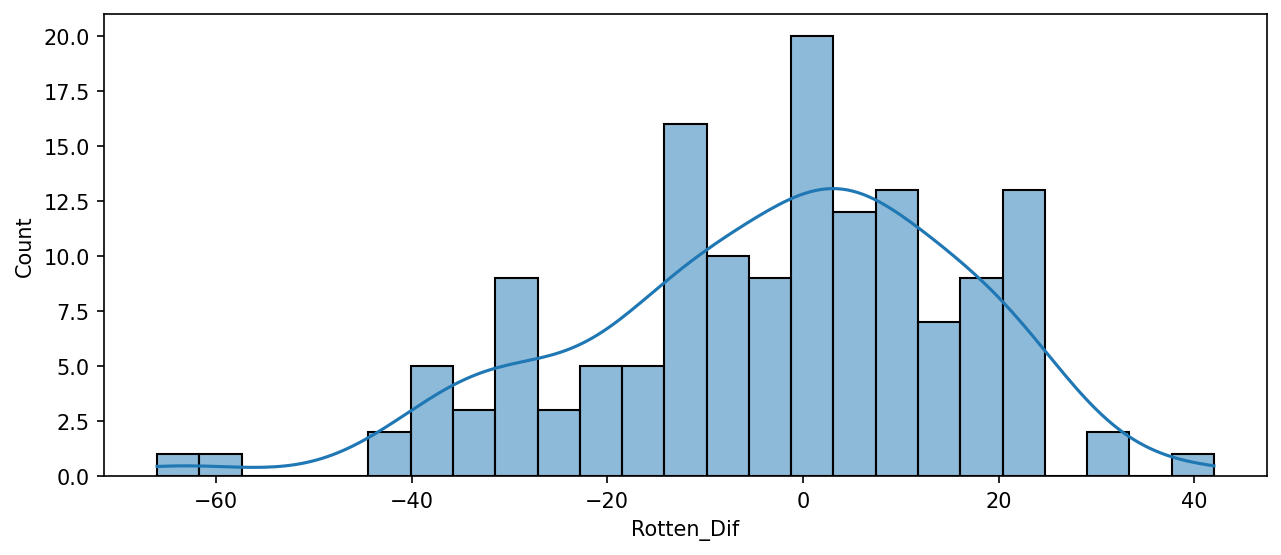

In [68]:
plt.figure(figsize=(10, 4), dpi=150)
sns.histplot(data=all_sites, x='Rotten_Dif', kde=True, bins=25)

Нарисуем график распределений абсолютных значений разницы рейтингов пользователей и критиков

<Axes: xlabel='Rotten_Dif', ylabel='Count'>

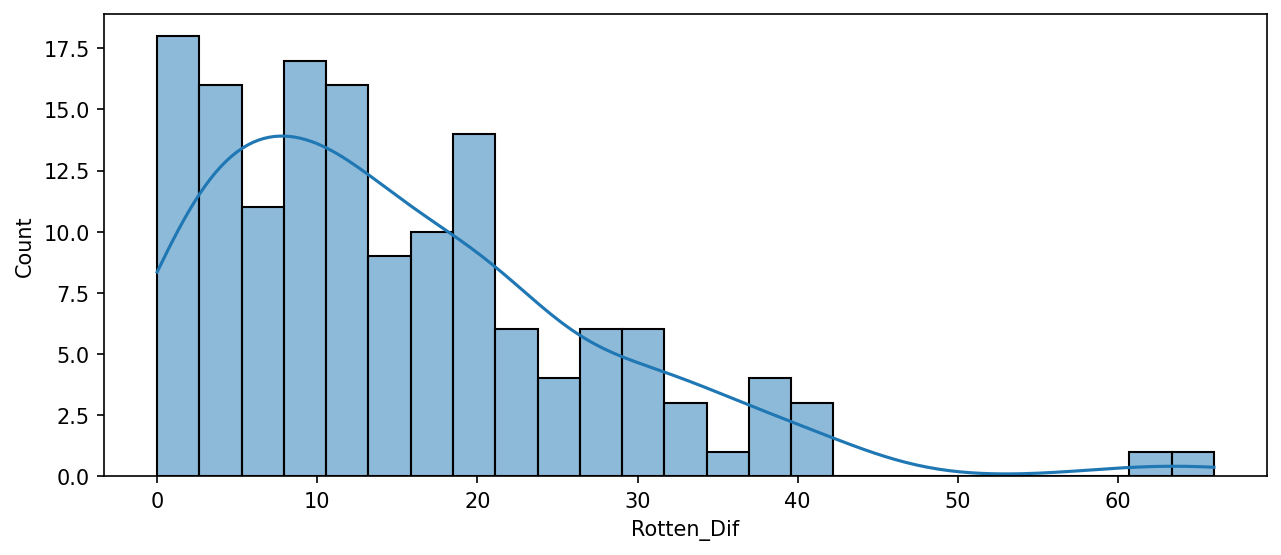

In [69]:
plt.figure(figsize=(10, 4), dpi=150)
sns.histplot(x=all_sites['Rotten_Dif'].apply(abs), kde=True, bins=25)

какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками критиков

In [70]:
all_sites.nsmallest(5, 'Rotten_Dif')[['FILM', 'Rotten_Dif']]

,FILM,Rotten_Dif
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


какие 5 фильмов в среднем были выше всего оценены критиками, по сравнению с оценками пользователей

In [71]:
all_sites.nlargest(5, 'Rotten_Dif')[['FILM', 'Rotten_Dif']]

,FILM,Rotten_Dif
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


Построим график сравнения рейтинга MetaCliric (пользователи и критики)

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

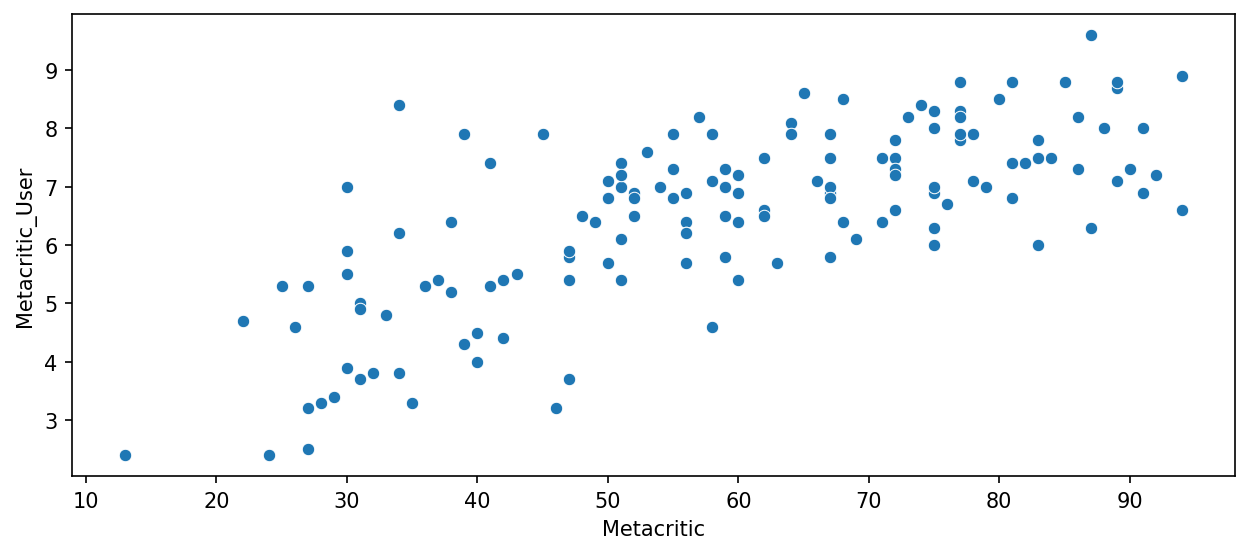

In [72]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

Построим график сравнения рейтинга голосов IMBD c Metacritic

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

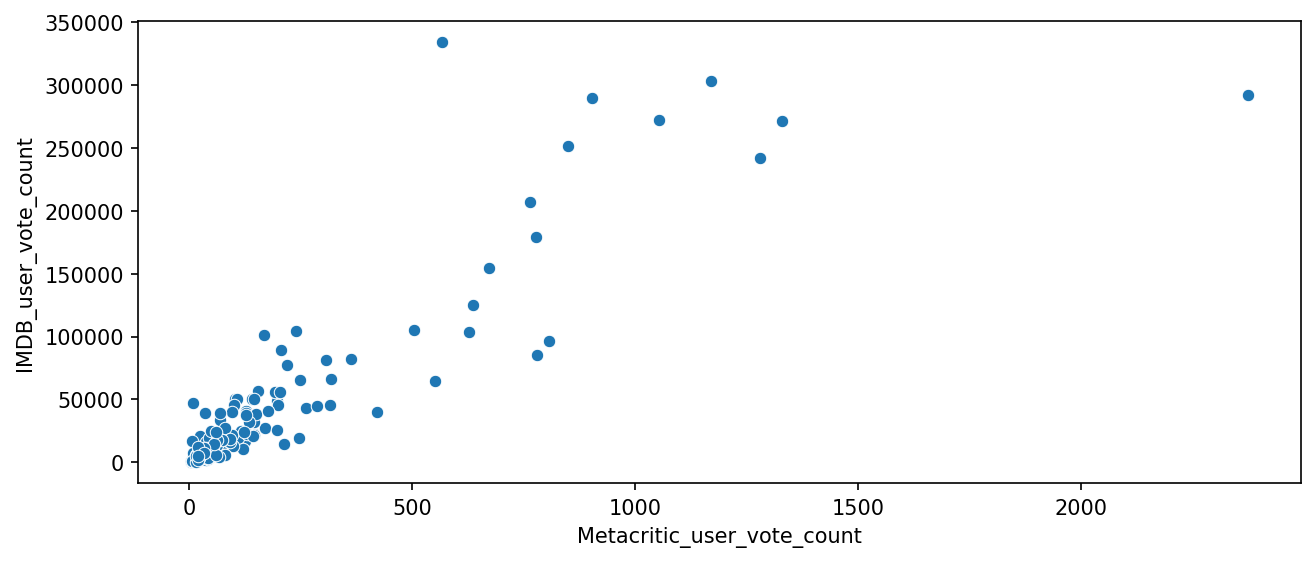

In [73]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y="IMDB_user_vote_count")

какой фильм получил наибольшее количество голосов на IMDB

In [74]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Dif
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


какой фильм получил наибольшее количество голосов на Metacritic

In [75]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Dif
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Сравнение рейтингов Fandago с другими рейтингами

объеденим Fandago и all_sites по колонке Film

In [76]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [77]:
df.head(3)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Dif
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Dif                  145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


Нормализуем колонки до диапазона от 0 до 5 в соответствии с колонками STARS и RATING от Fandango. Добавим колонки в all_sites и запишем в них нормализованные значения

In [79]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Dif                        42.0
Name: max, dtype: float64

In [80]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [81]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [82]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

In [83]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Dif,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Создадим новый датафрейм, в котором оставим только нормализованные рейтинги и рейтинги SATRS и RATING из таблицы fandango

In [84]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Dif',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [85]:
norm_score = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [86]:
norm_score.head(3)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7


Нарисуем график сравнения распределения нормализованных рейтингов от всех компаний 

<Axes: ylabel='Density'>

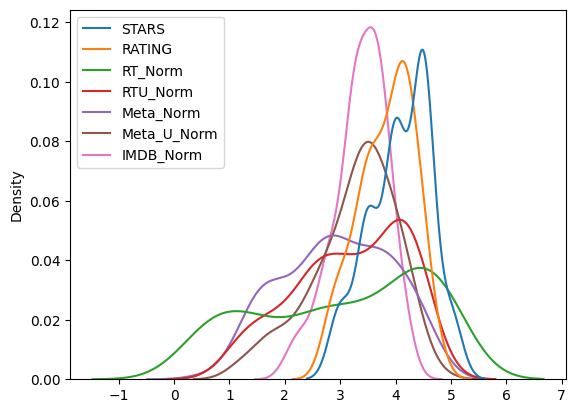

In [87]:
sns.kdeplot(data=norm_score)

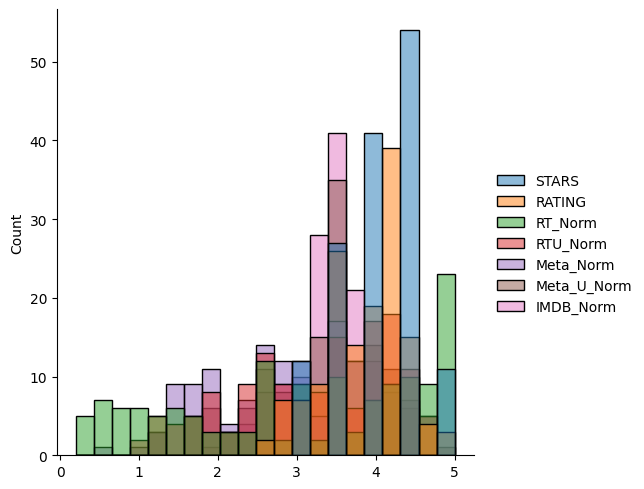

In [88]:
sns.displot(data=norm_score)

In [89]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\mmd28\AppData\Local\Temp\ipykernel_5336\2250574228.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_score, clip=[0, 5], shade=True, palette='Set1')


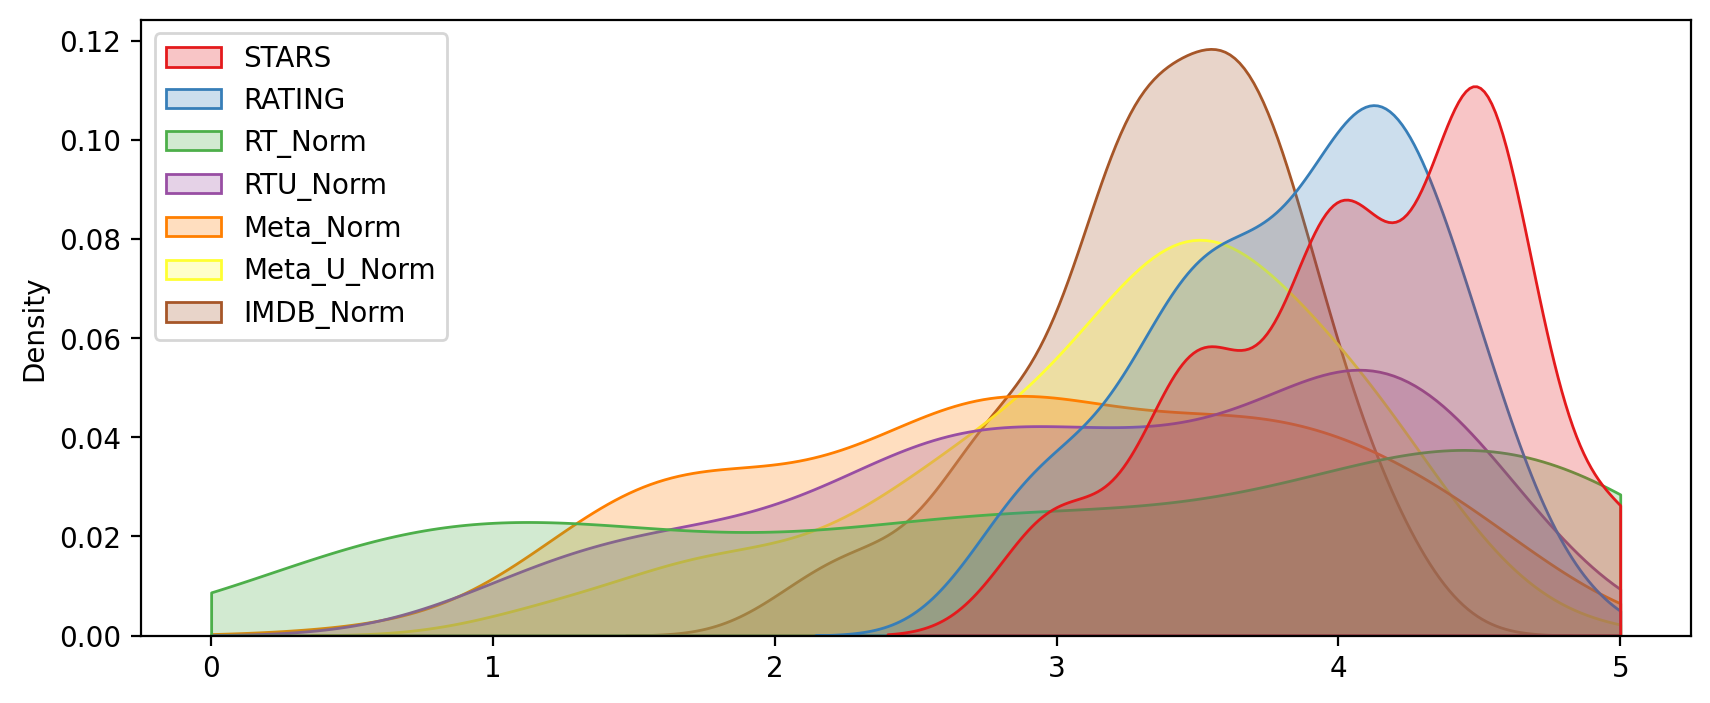

In [90]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
sns.kdeplot(data=norm_score, clip=[0, 5], shade=True, palette='Set1')

move_legend(ax, 'upper left')

нарисуем график сравнения распределения рейтингов Rotten tomatoes от критиков STARS Fandango

C:\Users\mmd28\AppData\Local\Temp\ipykernel_5336\1261018079.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_score[['RT_Norm', 'STARS']], clip=[0, 5], shade=True, palette='Set1')


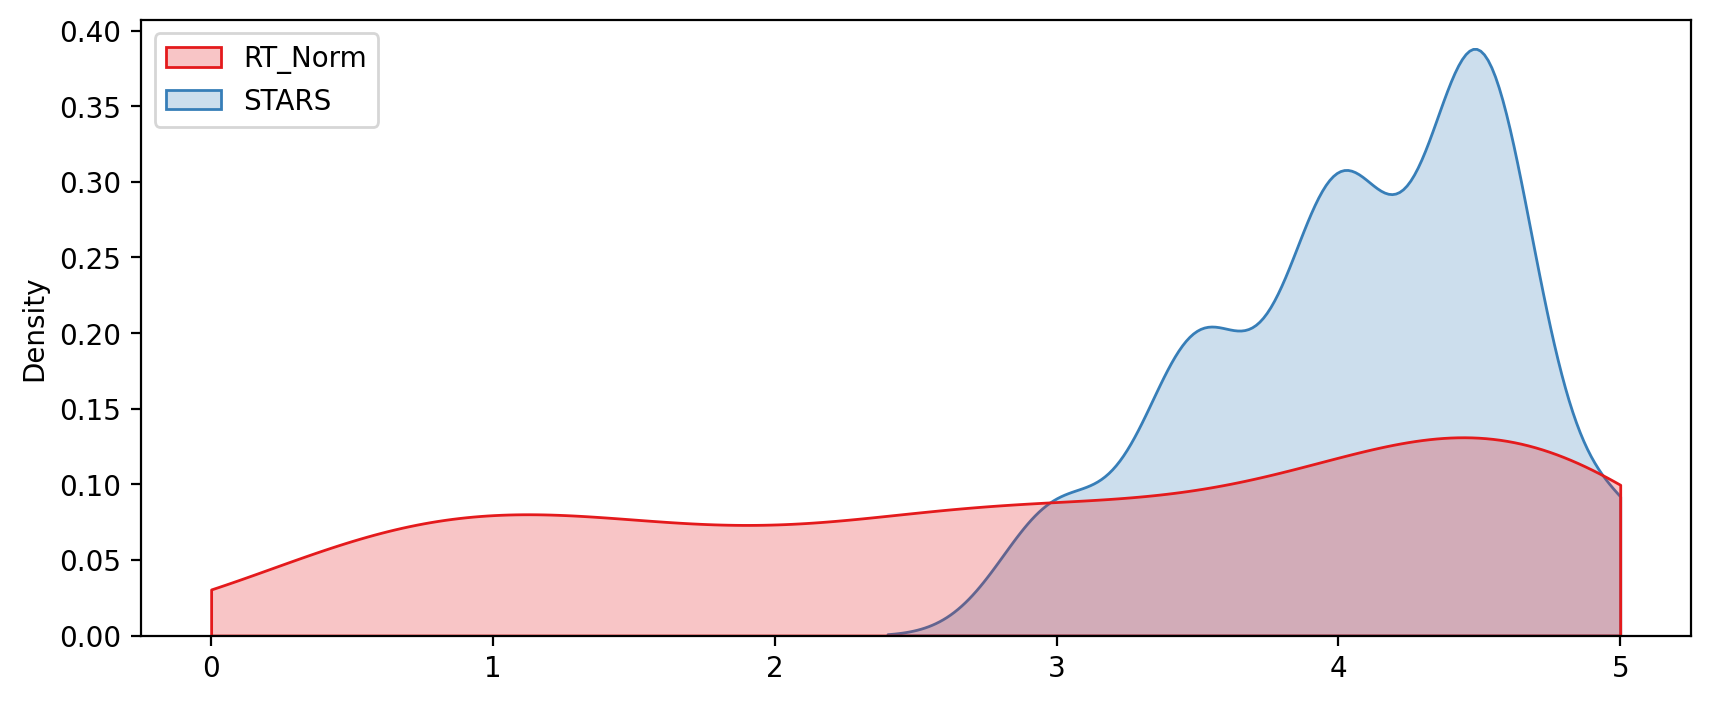

In [91]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
sns.kdeplot(data=norm_score[['RT_Norm', 'STARS']], clip=[0, 5], shade=True, palette='Set1')

move_legend(ax, 'upper left')

<Axes: ylabel='Count'>

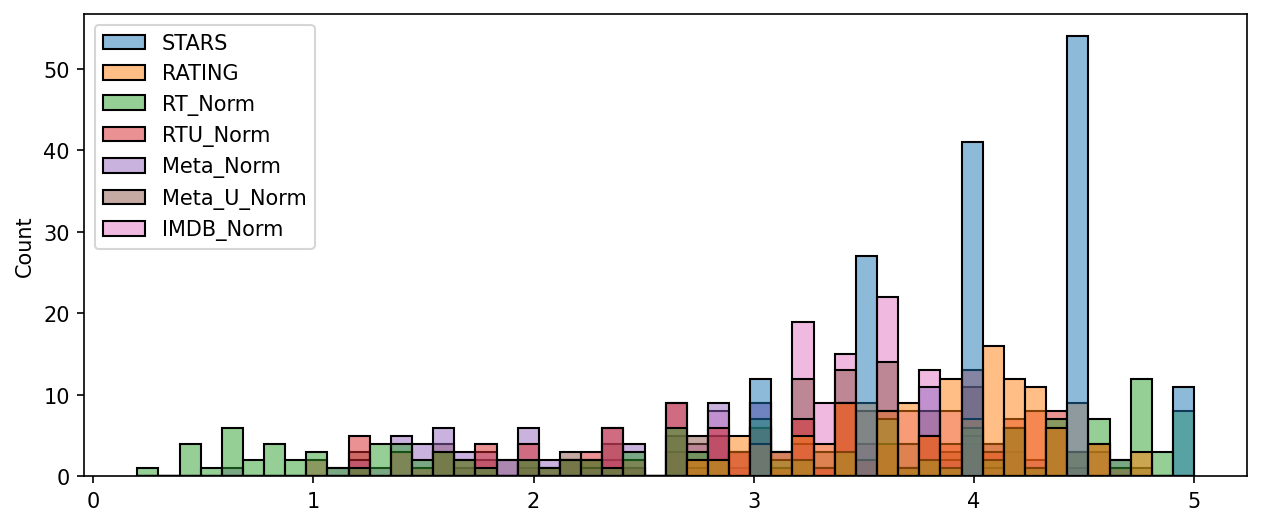

In [92]:
plt.figure(figsize=(10, 4), dpi=150)
sns.histplot(norm_score, bins=50)

как различные компании оценивают фильмы с наименьшими рейтингами?
Нарисуем график для всех нормализованных рейтингов. Фильмы с высокими рейтингами должны попадать в общие коастеры, а фильмы с низким рейтингом в другие общие кластеры

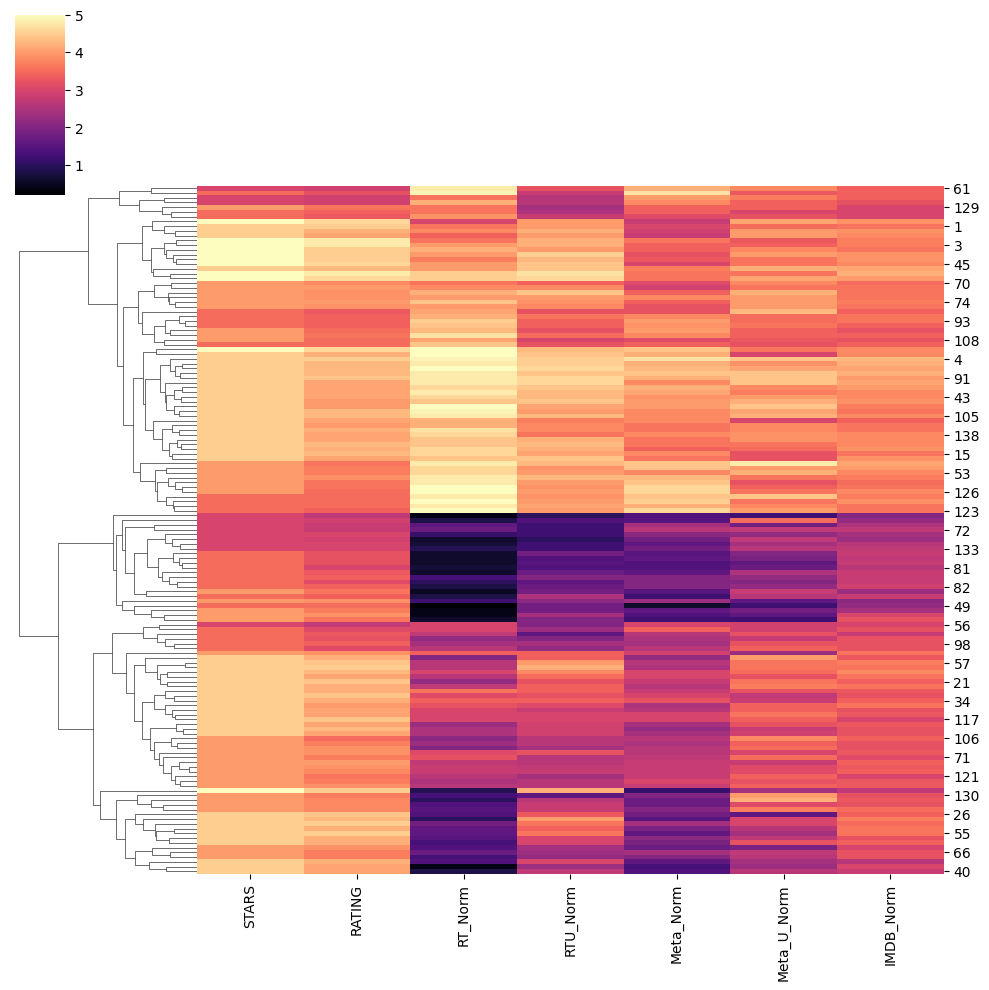

In [93]:
sns.clustermap(norm_score, cmap='magma', col_cluster=False)

Рейтинги Fandango выше рейтингов других компаний.
Посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic. Сгруппируем таблицу по колонке Film

In [94]:
norm_score.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [95]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]

In [96]:
norm_films.nsmallest(10, "RT_Norm")

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


In [97]:
worst_films = norm_films.nsmallest(10, "RT_Norm")

C:\Users\mmd28\AppData\Local\Temp\ipykernel_5336\2790231114.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films, clip=[0, 5], shade=True, palette='Set1')


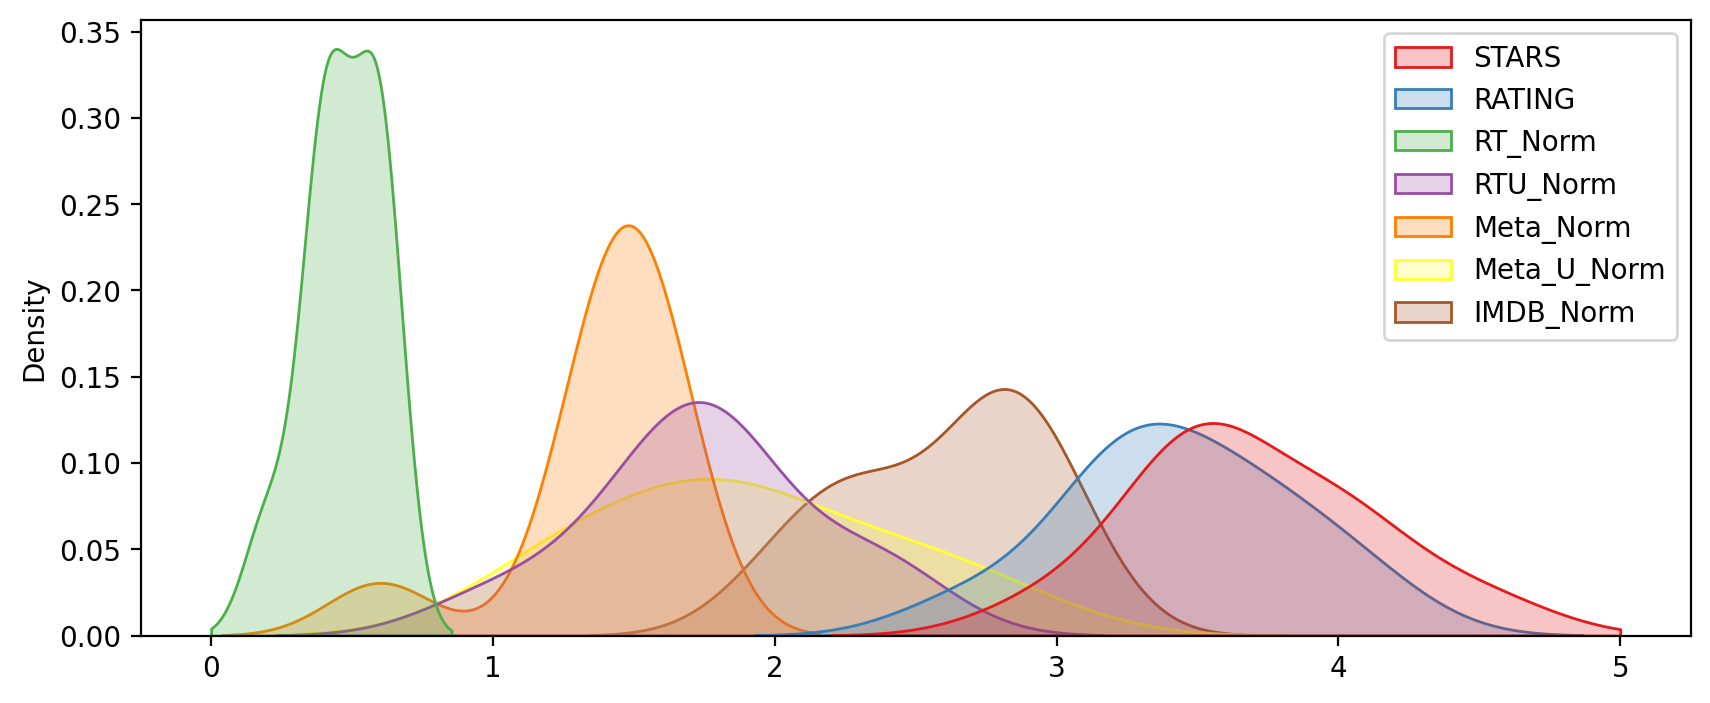

In [98]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
sns.kdeplot(data=worst_films, clip=[0, 5], shade=True, palette='Set1')

move_legend(ax, 'upper right')

Мы видим по колонкам STARS и RATING, что fandango обманывает. 

In [99]:
norm_films.iloc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [100]:
0.4 + 2.3 + 1.3 + 2.3 + 3.0

9.3

In [101]:
9.3/5

1.86